In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [153]:
df = pd.read_csv("Debtors Debt.csv")

In [154]:
df.head()

,debtor_id,total_debt,total_paid,collection_attempts,attempt_date,collector_id,amount_paid
0,1,29101,12022,1,03/11/2023,31,1537.0
1,1,29101,12022,1,06/04/2023,29,1537.0
2,1,29101,12022,1,28/12/2023,49,1537.0
3,1,29101,12022,1,08/06/2023,4,1537.0
4,1,29101,12022,1,19/05/2023,27,1537.0


In [155]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   debtor_id            1000 non-null   int64  
 1   total_debt           1000 non-null   int64  
 2   total_paid           1000 non-null   int64  
 3   collection_attempts  1000 non-null   int64  
 4   attempt_date         1000 non-null   object 
 5   collector_id         1000 non-null   int64  
 6   amount_paid          988 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 54.8+ KB


,debtor_id,total_debt,total_paid,collection_attempts,collector_id,amount_paid
count,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,988.000000
mean,19.070000,27989.129000,15179.011000,1.0,25.992000,2492.713563
std,10.170474,13955.896031,7882.734939,0.0,14.286078,1372.930526
min,1.000000,1238.000000,1279.000000,1.0,1.000000,62.000000
25%,9.000000,14502.000000,7919.000000,1.0,14.000000,1223.000000
50%,19.000000,30560.000000,14392.000000,1.0,25.000000,2622.000000
75%,28.000000,42509.000000,21480.000000,1.0,38.000000,3643.000000
max,37.000000,49482.000000,29879.000000,1.0,50.000000,4974.000000


In [156]:
df.isnull().sum()  # Count missing values
df.duplicated().sum()  # Check for duplicate rows

np.int64(0)

In [157]:
X = df[['total_debt', 'total_paid', 'collection_attempts', 'collector_id']]
y = df['amount_paid']

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [159]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Drop rows where y_train is NaN
X_train = X_train[y_train.notna()]
y_train = y_train.dropna()


In [160]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [161]:

y_pred = model.predict(X_test)

In [162]:
# Drop NaN values in y_test and corresponding X_test rows
X_test = X_test[y_test.notna()]
y_test = y_test.dropna()

In [163]:
from sklearn.metrics import mean_squared_error

# First, check their lengths
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred: {len(y_pred)}")

# Trim the longer one to match the shorter
min_len = min(len(y_test), len(y_pred))
y_test_trimmed = y_test[:min_len]
y_pred_trimmed = y_pred[:min_len]

# Now calculate the MSE
mse = mean_squared_error(y_test_trimmed, y_pred_trimmed)
print(f"Mean Squared Error: {mse:.2f}")


Length of y_test: 196
Length of y_pred: 200
Mean Squared Error: 1985725.63


In [164]:
# Drop NaNs from y_test and X_test together
X_test, y_test = X_test.loc[y_test.dropna().index], y_test.dropna()


In [165]:
from sklearn.metrics import r2_score

# Trim to equal lengths
min_len = min(len(y_test), len(y_pred))
y_test_trimmed = y_test[:min_len]
y_pred_trimmed = y_pred[:min_len]

# Calculate R² Score
r2 = r2_score(y_test_trimmed, y_pred_trimmed)
print(f"R² Score: {r2:.2f}")


R² Score: -0.04


In [166]:
from sklearn.metrics import mean_squared_error

# Trim both arrays to the same length
min_len = min(len(y_test), len(y_pred))
y_test_trimmed = y_test[:min_len]
y_pred_trimmed = y_pred[:min_len]

# Calculate MSE
mse = mean_squared_error(y_test_trimmed, y_pred_trimmed)
print(f"Mean Squared Error: {mse:.2f}")



Mean Squared Error: 1985725.63


In [167]:
import numpy as np
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")


Root Mean Squared Error: 1409.16


In [168]:
#Positive values means Increase repayment amount
#Negative values means Decrease repayment amount

coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
print(coefficients.sort_values(by="Coefficient", ascending=False))


               Feature  Coefficient
3         collector_id     5.747722
2  collection_attempts     0.000000
1           total_paid    -0.012010
0           total_debt    -0.015584


In [169]:

# Ensure both arrays are the same length
min_len = min(len(y_test), len(y_pred))
y_test_trimmed = y_test[:min_len]
y_pred_trimmed = y_pred[:min_len]

# Create the comparison DataFrame
comparison = pd.DataFrame({
    'Actual': y_test_trimmed,
    'Predicted': y_pred_trimmed
})
print(comparison.head(10))


     Actual    Predicted
521  1223.0  2747.663257
737  3664.0  2906.029889
740  3664.0  3015.236598
660  1014.0  2410.621589
411  3178.0  2173.750807
678  1237.0  2272.676272
626   537.0  2270.625835
513  2553.0  2718.924649
859  4252.0  2623.296052
136   530.0  2462.738366


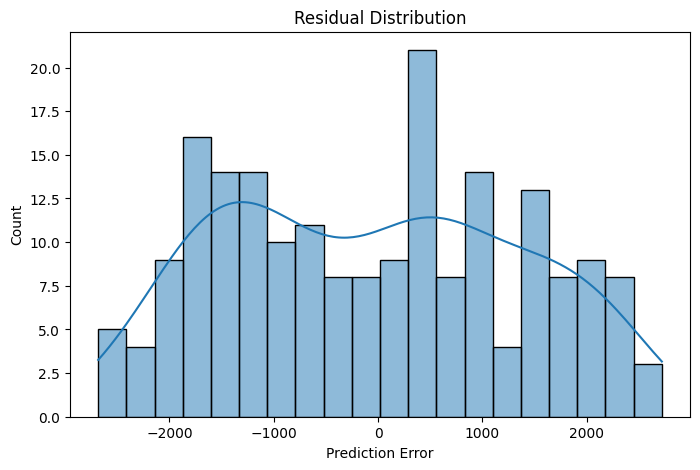

In [170]:
# Trim to same length
min_len = min(len(y_test), len(y_pred))
y_test_trimmed = y_test[:min_len]
y_pred_trimmed = y_pred[:min_len]

# Calculate residuals
residuals = y_test_trimmed - y_pred_trimmed

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=20, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Prediction Error")
plt.show()


In [171]:
#SKEWNESS SHOWS WE NEED TO DO BETTER IN COLLECTIONS! LOL